In [1]:
import sys
sys.path.insert(1, '../') # make sure to use the code in this repo

import matplotlib.dates as mdates
import datetime
import matplotlib.pyplot as plt
import numpy as np
import astropy.io.fits as fits
import scipy

import matplotlib as mpl
# try to use the precise epoch
mpl.rcParams['date.epoch']='1970-01-01T00:00:00'
try:
    mdates.set_epoch('1970-01-01T00:00:00')
except:
    pass

import detectRadioburst as drb

from skimage.transform import probabilistic_hough_line

%load_ext autoreload
%autoreload 2

In [62]:
fname  = 'L857852_SAP000_B000_S0_P000_bf/LOFAR_20220413_095000_LBA_OUTER.fits'
fname  = 'L857852_SAP000_B000_S0_P000_bf/LOFAR_20220413_135000_LBA_OUTER.fits'
#fname  = 'L857852_SAP000_B000_S0_P000_bf/LOFAR_20220413_150000_LBA_OUTER.fits'
#fname  = 'L857852_SAP000_B000_S0_P000_bf/LOFAR_20220413_103000_LBA_OUTER.fits'

(dyspec,t_fits,f_fits,hdu)  = drb.read_fits(fname)
(dyspec,f_fits) =  drb.cut_low(dyspec,f_fits,f_low_cut_val=25)

In [63]:
drb.idx_val_pos(f_fits, 25)

0

Text(0.5, 1.0, '2022/04/13 Radio Flux Intensity LOFAR LBA_OUTER')

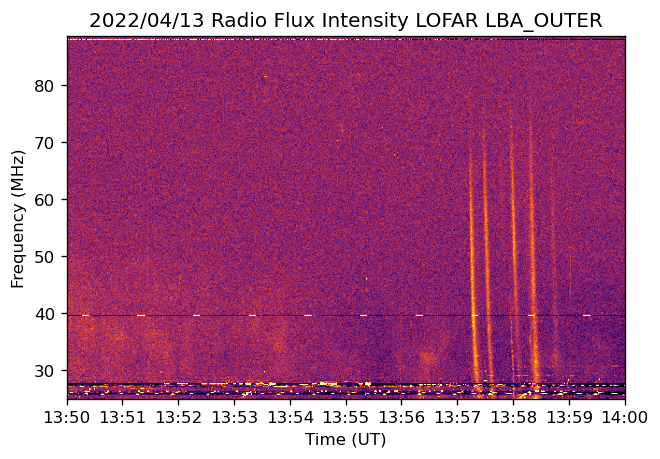

In [64]:
(data_fits_new_tmp,data_fits_new) = drb.preproc(
        dyspec,gauss_sigma=1.5)

fig = plt.figure(figsize=(6, 4), dpi=120)
ax = plt.gca()
ax.imshow(data_fits_new_tmp.T,aspect='auto',  origin='lower', 
                   vmin=(np.mean(data_fits_new_tmp)-2*np.std(data_fits_new_tmp)),
                   vmax=(np.mean(data_fits_new_tmp)+3*np.std(data_fits_new_tmp)),
                   extent=[t_fits[0],t_fits[-1],f_fits[0],f_fits[-1]],cmap='inferno')

ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.set_xlabel('Time (UT)')
ax.set_ylabel('Frequency (MHz)')
ax.set_title(hdu[0].header['CONTENT'])

In [65]:
bmap = drb.binarization(data_fits_new,N_order=6,peak_r=1)

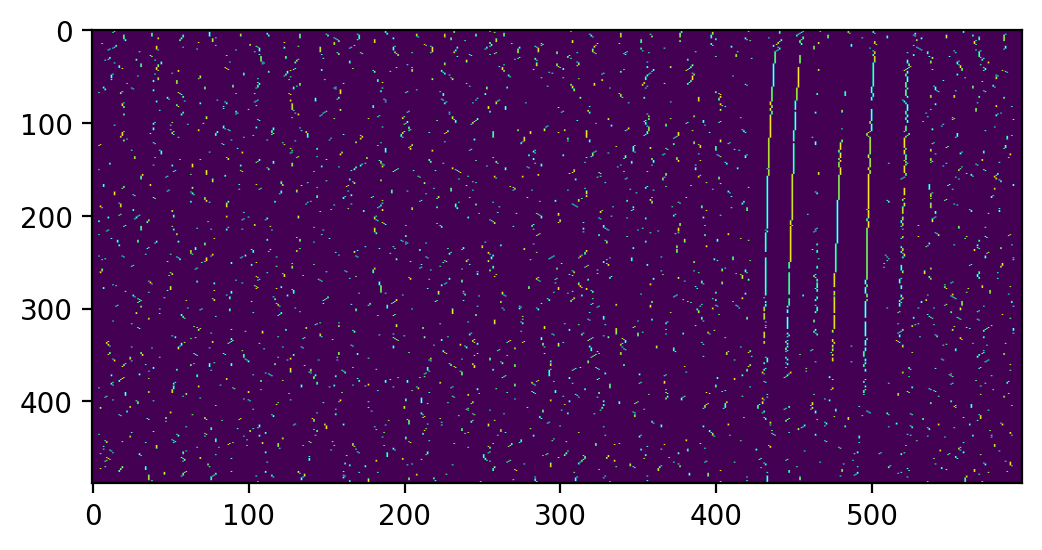

In [66]:
fig,ax = plt.subplots(1,1,figsize=[6,3],dpi=200)
#lines = sorted(lines, key=lambda i: i[0][1])
ax.imshow(bmap.T,aspect='auto')

In [67]:
lines = drb.hough_detect(bmap,dyspec,threshold=60,line_gap=10,line_length=25,
            theta=np.linspace(np.pi/2-np.pi/8,np.pi/2-1/180*np.pi,300))

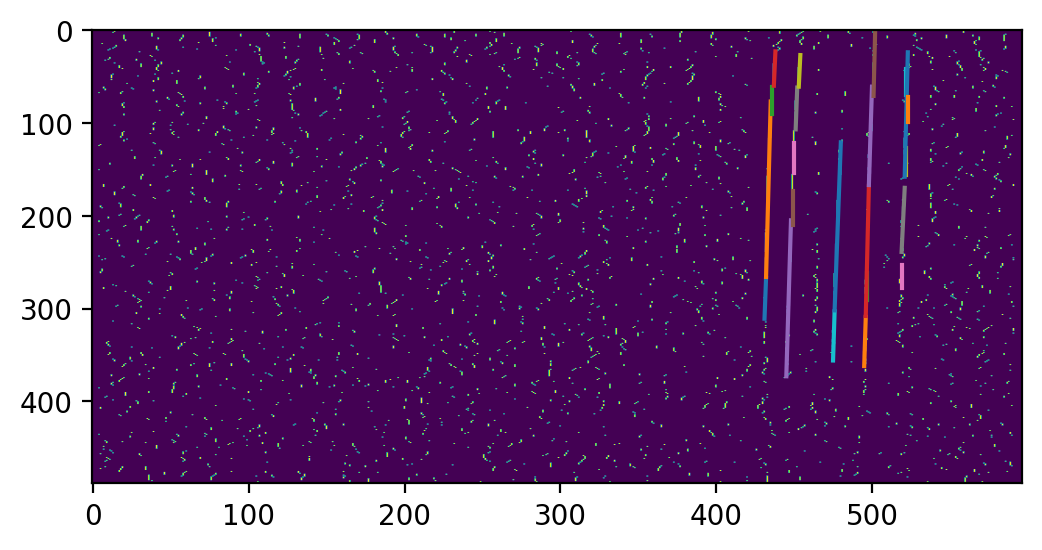

In [68]:
fig,ax = plt.subplots(1,1,figsize=[6,3],dpi=200)
lines = sorted(lines, key=lambda i: i[0][1])
ax.imshow(bmap.T,aspect='auto')
for line in lines:
    p0,p1= line
    ax.plot( (p0[1], p1[1]),(p0[0], p1[0]))


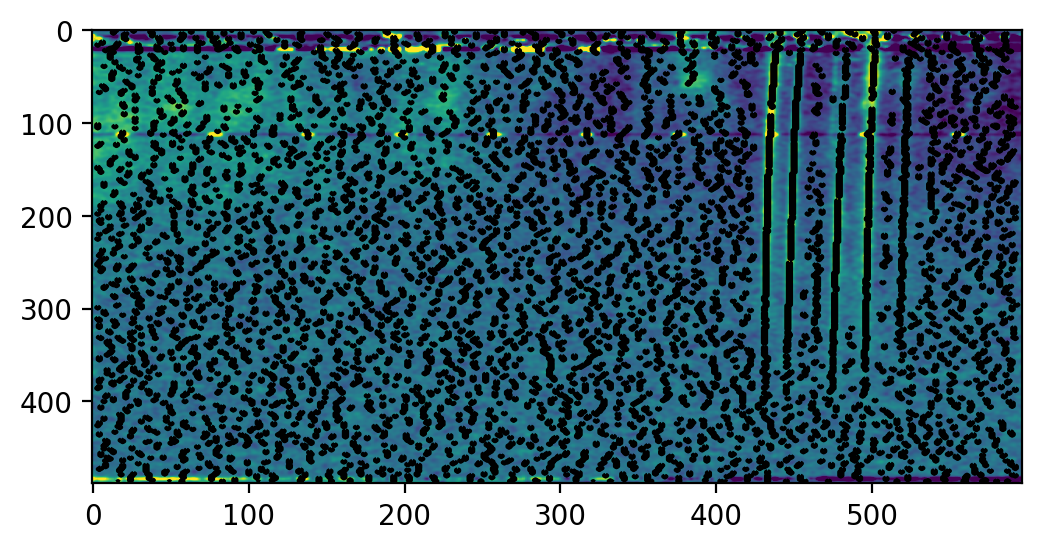

In [48]:
fig = plt.figure(figsize=[6,3],dpi=200)
plt.imshow(data_fits_new.T,aspect='auto',
                   vmin=(np.mean(data_fits_new)-2*np.std(data_fits_new)),
                   vmax=(np.mean(data_fits_new)+3*np.std(data_fits_new)))
plt.contour(bmap.T,[0,0.5,1],colors='k')

#plt.xlim((250,400))

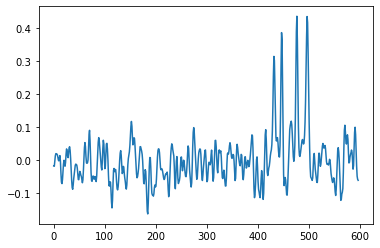

In [49]:
plt.plot(data_fits_new[:,300])

In [11]:
line_sets = drb.line_grouping(lines)
# group the detected lines into group in regard of events

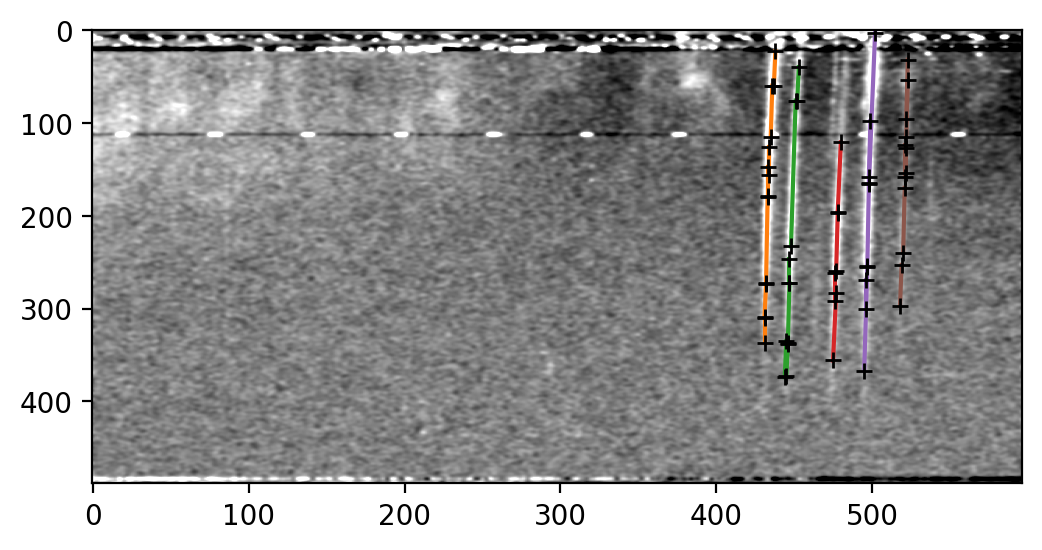

In [12]:
fig,ax = plt.subplots(1,1,figsize=[6,3],dpi=200)
ax.imshow(data_fits_new.T,aspect='auto',
                   vmin=(np.mean(data_fits_new)-2*np.std(data_fits_new)),
                   vmax=(np.mean(data_fits_new)+2*np.std(data_fits_new)),cmap='gray')

for idx,lines in enumerate(line_sets):
    for line in lines:
        p0,p1= line
        ax.plot( (p0[1], p1[1]),(p0[0], p1[0]),color='C'+str(idx+1))
        ax.plot( (p0[1], p1[1]),(p0[0], p1[0]),'k+',zorder=10)
    #ax.set_xlim((500,600))
#ax.set_ylim((bmap.shape[0], 0))

In [13]:
import radioTools as rt

In [14]:
#(rt.freq_to_R(20e6)-rt.freq_to_R(80e6))/rt.c_r

In [15]:
(v_beam, f_range_burst, t_range_burst, model_curve_set,
     t_set_arr,f_set_arr,t_model_arr,f_model_arr
    )= drb.get_info_from_linegroup(line_sets,t_fits,f_fits)

In [16]:
f_set_arr

array([58.04443359, 63.78173828, 41.22314453, 45.65429688, 47.21679688,
       56.34765625, 41.61376953, 45.12939453, 32.09228516, 40.0390625 ,
       29.22363281, 37.57324219])

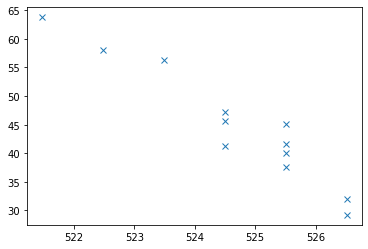

In [17]:
plt.plot(t_set_arr,f_set_arr,'x')

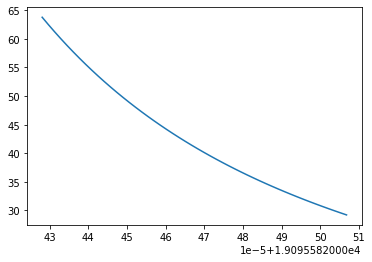

In [18]:
plt.plot(t_model_arr,f_model_arr)

In [19]:
line_sets

[[((310, 431), (337, 431)),
  ((274, 432), (309, 431)),
  ((180, 433), (273, 432)),
  ((148, 433), (179, 433)),
  ((126, 434), (156, 434)),
  ((60, 436), (115, 435)),
  ((23, 438), (60, 437))],
 [((335, 445), (374, 444)),
  ((338, 446), (373, 445)),
  ((247, 447), (272, 447)),
  ((273, 447), (337, 446)),
  ((76, 451), (233, 448)),
  ((40, 453), (76, 452))],
 [((262, 476), (292, 476)),
  ((283, 477), (356, 475)),
  ((197, 478), (260, 477)),
  ((121, 480), (196, 478))],
 [((269, 496), (301, 496)),
  ((255, 497), (367, 495)),
  ((166, 498), (254, 497)),
  ((98, 499), (158, 498)),
  ((3, 502), (165, 498))],
 [((253, 519), (297, 518)),
  ((124, 521), (158, 521)),
  ((170, 521), (240, 520)),
  ((127, 522), (154, 522)),
  ((54, 523), (115, 522)),
  ((32, 523), (96, 522))]]

Text(0.5, 1.0, '2022/04/13 Radio Flux Intensity LOFAR LBA_OUTER')

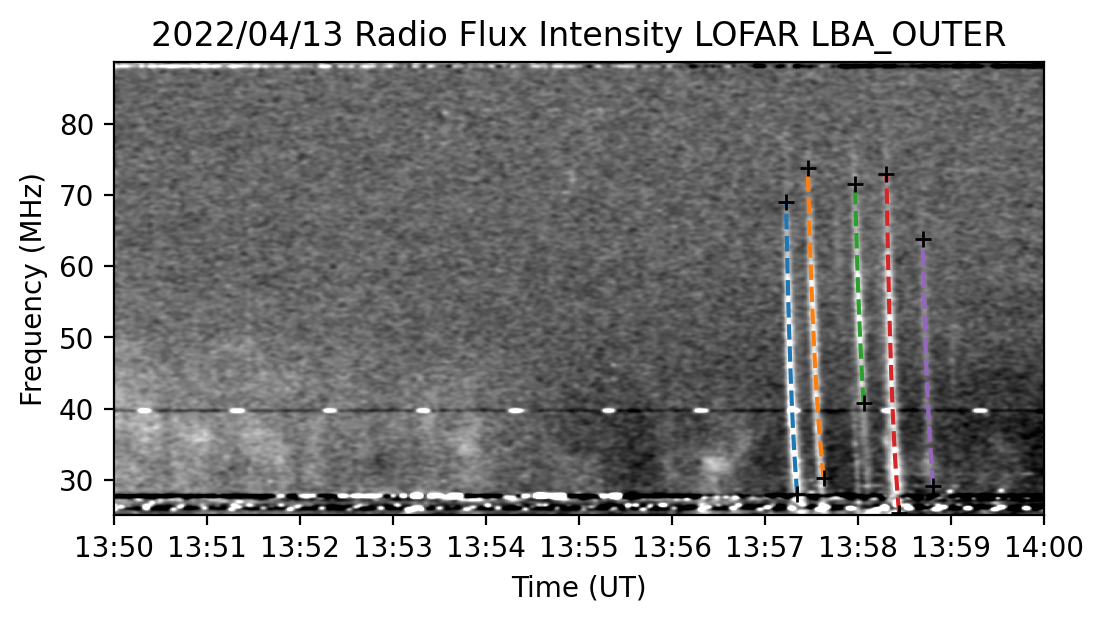

In [20]:
fig,ax = plt.subplots(1,1,figsize=[6,3],dpi=200)
lines = sorted(lines, key=lambda i: i[0][1])
ax.imshow(data_fits_new.T,aspect='auto',origin='lower', 
                   vmin=(np.mean(data_fits_new)-2*np.std(data_fits_new)),
                   vmax=(np.mean(data_fits_new)+3*np.std(data_fits_new)),cmap='gray',
                   extent=[t_fits[0],t_fits[-1],f_fits[0],f_fits[-1]])
for idx,model in enumerate(model_curve_set):
    plt.plot(model[0],model[1],ls='--')
    plt.plot(t_range_burst[idx],f_range_burst[idx],'k+')
    


ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.set_xlabel('Time (UT)')
ax.set_ylabel('Frequency (MHz)')
ax.set_title(hdu[0].header['CONTENT'])


#ax.set_xlim([t_fits[200],t_fits[400]])
#plt.ylim([10,88])


In [21]:
import json

In [22]:
fname_json  = fname.replace('.fits','.json')

In [23]:
with open(fname_json, 'r') as fp:
    dict_old = json.load(fp)
    
fp.close()

In [24]:
t_range_burst

[[19095.58149204752, 19095.581408889255],
 [19095.581689647068, 19095.58157101159],
 [19095.58198756253, 19095.581923106547],
 [19095.58225290837, 19095.582158457983],
 [19095.58250678026, 19095.582428092715]]

In [25]:
dict_old

{'telescope': 'LOFAR',
 'instrume': 'LBA_OUTER',
 'projectID': 'LOFAR4SWDevelopement',
 'obsID': '857852',
 'source': './L857852_SAP000_B000_S0_P000_bf.h5',
 'date': '2022-04-13',
 'time': '13:50:00.000000',
 'event': {'detection': True, 'type': 'III', 'level': 'strong'},
 'n_freq': 600,
 'n_time': 597,
 'freq_range': [10.44921875, 88.56201171875],
 'time_range': ['2022-04-13 13:50:00.000000', '2022-04-13 14:00:00.000000']}

In [26]:
event_detail = []
for idx,v_cur in enumerate(v_beam):
    event_detail.append({
        'v_beam':v_cur,
        'freq_range':((f_range_burst[idx])),
        'time_range':((t_range_burst[idx])),
        'str_time':mdates.num2date(t_range_burst[idx][0]).strftime("%H:%M:%S")})

In [27]:
dict_old['event']={
    'detection': True,
    'type':'III',
    'detail': event_detail
}

In [28]:
dict_old

{'telescope': 'LOFAR',
 'instrume': 'LBA_OUTER',
 'projectID': 'LOFAR4SWDevelopement',
 'obsID': '857852',
 'source': './L857852_SAP000_B000_S0_P000_bf.h5',
 'date': '2022-04-13',
 'time': '13:50:00.000000',
 'event': {'detection': True,
  'type': 'III',
  'detail': [{'v_beam': 0.11841258685980799,
    'freq_range': [28.0517578125, 68.994140625],
    'time_range': [19095.58149204752, 19095.581408889255],
    'str_time': '13:57:20'},
   {'v_beam': 0.0785893033655193,
    'freq_range': [30.26123046875, 73.81591796875],
    'time_range': [19095.581689647068, 19095.58157101159],
    'str_time': '13:57:37'},
   {'v_beam': 0.08265409244815236,
    'freq_range': [40.83251953125, 71.47216796875],
    'time_range': [19095.58198756253, 19095.581923106547],
    'str_time': '13:58:03'},
   {'v_beam': 0.12427506084647683,
    'freq_range': [25.439453125, 72.91259765625],
    'time_range': [19095.58225290837, 19095.582158457983],
    'str_time': '13:58:26'},
   {'v_beam': 0.10942378297405518,
    'f

In [29]:
with open('test.json', 'w') as fp:
     json.dump(dict_old,fp)
fp.close()